# Computer games market research

Purpose of analysis:
identify patterns that determine the success of computer games and gaming platforms in order to identify a potentially successful product and plan advertising campaigns in future periods.

Data:
historical data on the computer games market for the period up to 2016.
Data Description
Name - the name of the game
Platform - platform
Year_of_Release - year of release
Genre - game genre
NA_sales - sales in North America (millions of copies sold)
EU_sales - sales in Europe (millions of copies sold)
JP_sales - sales in Japan (millions of copies sold)
Other_sales - sales in other countries (millions of copies sold)
Critic_Score - critics' score (maximum 100)
User_Score - user rating (maximum 10)
Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.
Data for 2016 may be incomplete.


# General information about the data

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
data=pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [4]:
data.columns=data.columns.str.lower()

In [5]:
data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
#–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—Ä–æ–ø—É—Å–∫–∏
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
data['name']=data['name'].fillna(0)
data['rating']=data['rating'].fillna(0)

In [9]:
#–∏–∑—É—á–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
data['user_score']=pd.to_numeric(data['user_score'], errors='coerce')
data.loc[:,'year_of_release'] = data.loc[:,'year_of_release'].astype('Int64',errors='ignore')

In [11]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [12]:
#–ø–æ—Å—á–∏—Ç–∞–µ–º –ø—Ä–æ–¥–∞–∂–∏ –≤–æ –≤—Å–µ—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö
data['total_sales']=(data['na_sales'])+(data['eu_sales'])+(data['jp_sales'])+(data['other_sales'])

In [13]:
data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN      0   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN      0   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

# Exploratory Data Analysis

## Game releases by year (from 1980 to 2016)

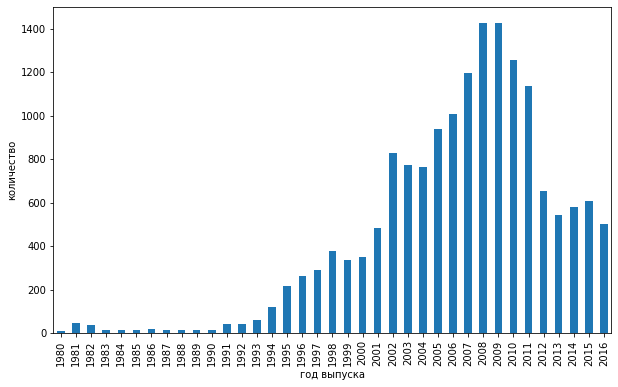

In [14]:
#—É–∑–Ω–∞–µ–º —Å–∫–æ–ª—å–∫–æ –∏–≥—Ä –≤—ã–ø—É—Å–∫–∞–ª–æ—Å—å –≤ —Ä–∞–∑–Ω—ã–µ –≥–æ–¥—ã. year_of_release —Å–æ–¥–µ—Ä–∂–∏—Ç 37 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
data.groupby('year_of_release')['name'].count()\
.plot(kind='bar', figsize=(10,6), ylabel='–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ', xlabel='–≥–æ–¥ –≤—ã–ø—É—Å–∫–∞');

The most games were released in 2008-2009. Very few games were released before 1995; this data is not important for analysis. After 2011, there was a sharp drop in sales, which is likely due to the sharp increase in the popularity of mobile games.

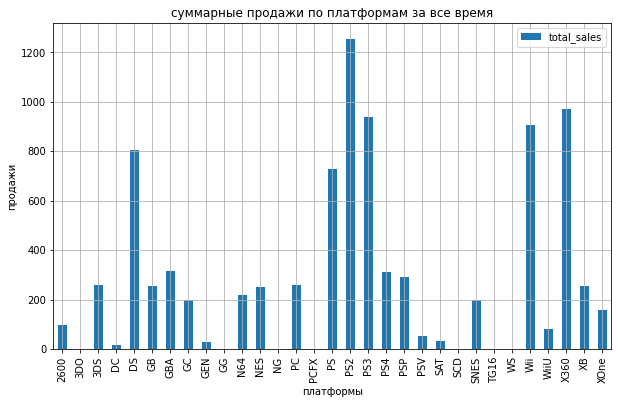

In [15]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.plot(kind='bar', grid=True, figsize=(10,6), ylabel='–ø—Ä–æ–¥–∞–∂–∏', xlabel='–ø–ª–∞—Ç—Ñ–æ—Ä–º—ã').set_title('—Å—É–º–º–∞—Ä–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º –∑–∞ –≤—Å–µ –≤—Ä–µ–º—è');


### Setting the current period for analysis

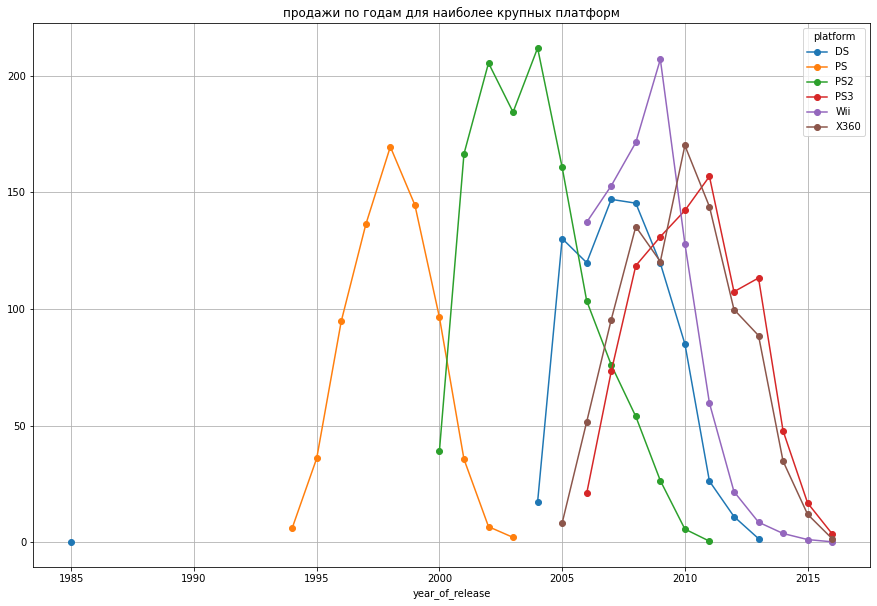

In [16]:
# Let's plot the distribution of sales by year for the largest platforms. 
data.query('platform=="DS" \
or platform=="PS" \
or platform=="PS2" \
or platform=="PS3" \
or platform=="Wii" \
or platform=="X360"')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
.plot(style='o-',  figsize=(15,10),grid=True).set_title('–ø—Ä–æ–¥–∞–∂–∏ –ø–æ –≥–æ–¥–∞–º –¥–ª—è –Ω–∞–∏–±–æ–ª–µ–µ –∫—Ä—É–ø–Ω—ã—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º');

The lifespan of the platforms is about 10 years. In addition, a significant change in the market in 2011-2012 is noticeable. Accordingly, the current period for analysis is the period from 2012.
To make a forecast for 2017, let‚Äôs take data for the previous 5 years:

In [17]:
actual_data=data.query('year_of_release>2011')

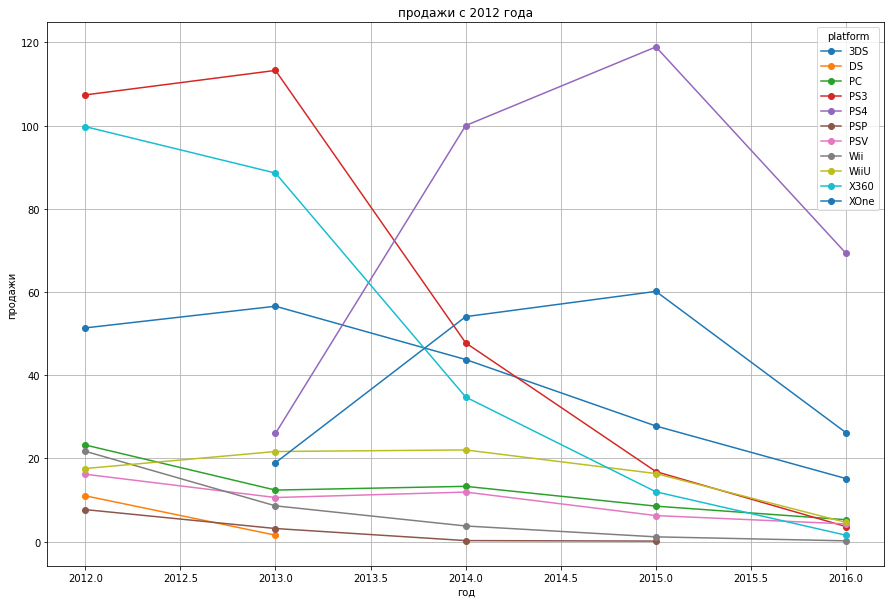

In [18]:
actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
.plot(style='o-', figsize=(15,10),grid=True, ylabel='–ø—Ä–æ–¥–∞–∂–∏', xlabel='–≥–æ–¥').set_title('–ø—Ä–æ–¥–∞–∂–∏ —Å 2012 –≥–æ–¥–∞');

In the period 2013-2015, only two platforms showed sales growth - PS4 and XOne. In 2016, both platforms show a decrease in sales, but this may be due to incomplete data (for example, the study was probably conducted in mid-2016, and only takes into account half of potential sales), or to some feature of sales specifically in 2016. Considering that both platforms have not yet reached the age of 5 years - the half-life period of the platform, you can count on making a profit.

### Sales by platform (from 2012 to 2016)

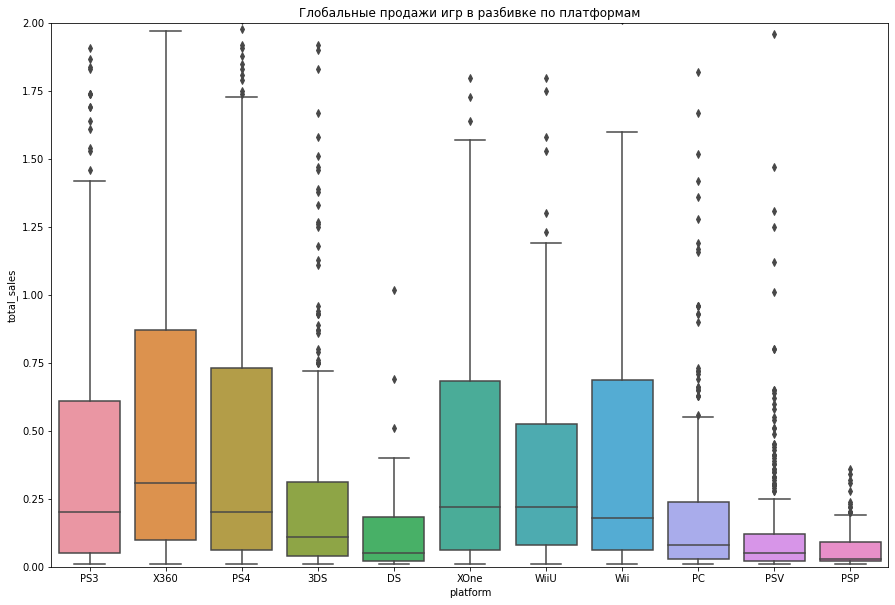

In [19]:
plt.figure(figsize=(15,10))
plt.ylim(0,2)
sb.boxplot(x=actual_data['platform'], y=actual_data['total_sales'])\
.set_title('–ì–ª–æ–±–∞–ª—å–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏ –∏–≥—Ä –≤ —Ä–∞–∑–±–∏–≤–∫–µ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º');



Based on the boxplots, we can conclude that game sales are distributed very unevenly, the distribution is asymmetrical and skewed towards large values, while the median values are similar on all popular platforms.

### The impact of reviews on sales

Let's study how reviews from users and critics affect sales inside the PS3.

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏  0.40656790206178095


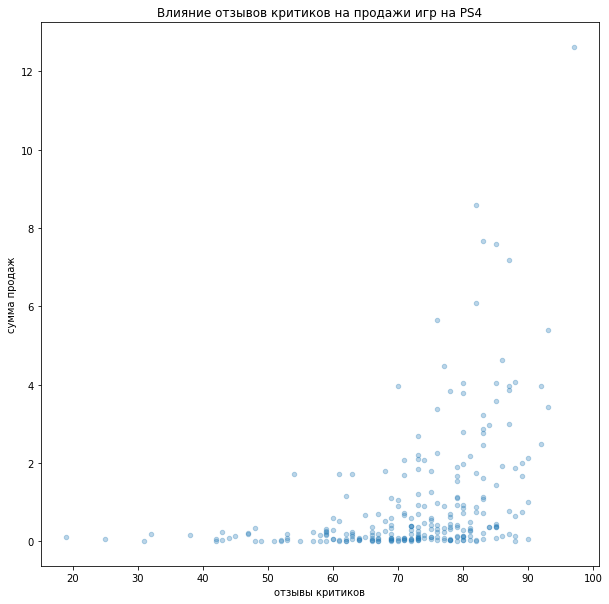

In [20]:
ps4=actual_data.query('platform=="PS4"')
ps4.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,10), 
         alpha=0.3, ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('–æ—Ç–∑—ã–≤—ã –∫—Ä–∏—Ç–∏–∫–æ–≤'))\
.set_title('–í–ª–∏—è–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –∏–≥—Ä –Ω–∞ PS4');
print('–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ ',ps4['critic_score'].corr(ps4['total_sales']));

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏  -0.031957110204556376


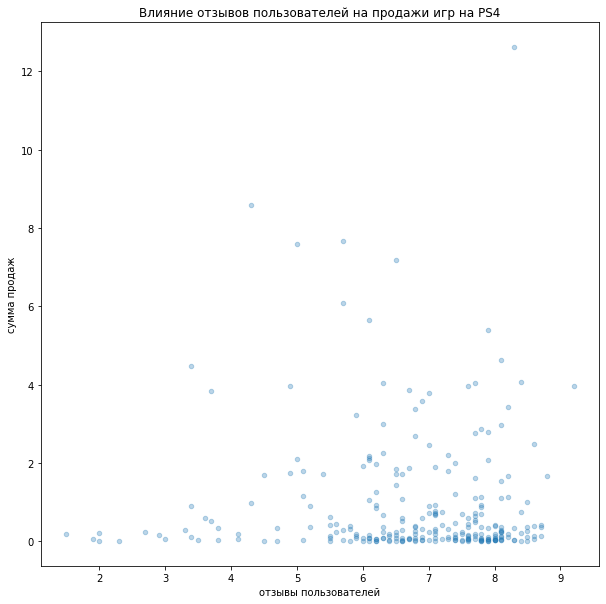

In [21]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,10), alpha=0.3,
        ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('–æ—Ç–∑—ã–≤—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π'))\
.set_title('–í–ª–∏—è–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –∏–≥—Ä –Ω–∞ PS4');
print('–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ ',ps4['user_score'].corr(ps4['total_sales']));

We can conclude that reviews from critics show a positive correlation with sales, while user reviews do not affect sales.

Let's compare the results with two other popular platforms: XOne and X360

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏  0.4169983280084017


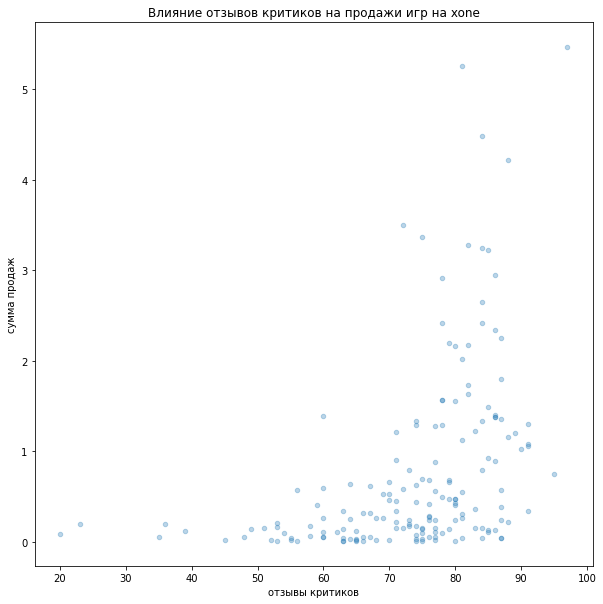

In [22]:
xone=actual_data.query('platform=="XOne"')
xone.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,10), alpha=0.3,
          ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('–æ—Ç–∑—ã–≤—ã –∫—Ä–∏—Ç–∏–∫–æ–≤'))\
.set_title('–í–ª–∏—è–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –∏–≥—Ä –Ω–∞ xone');
print('–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ ',xone['critic_score'].corr(xone['total_sales']));

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏  -0.06892505328279414


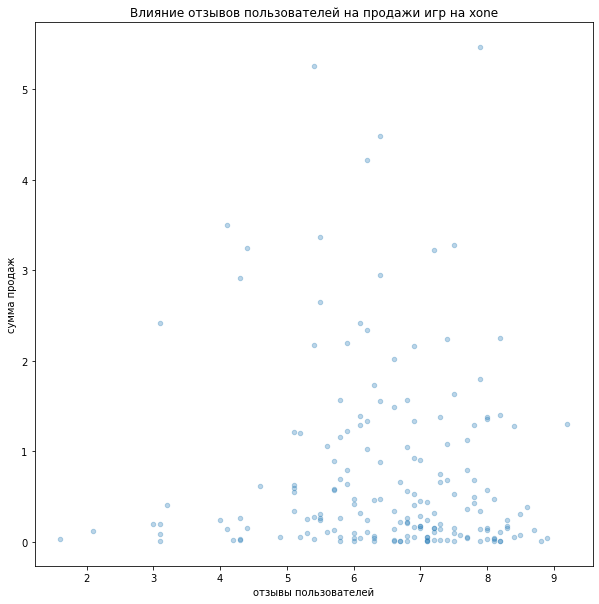

In [23]:
xone.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,10), alpha=0.3,
         ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('–æ—Ç–∑—ã–≤—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π'))\
.set_title('–í–ª–∏—è–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –∏–≥—Ä –Ω–∞ xone');
print('–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ ',xone['user_score'].corr(xone['total_sales']));

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏  0.3605734888507336


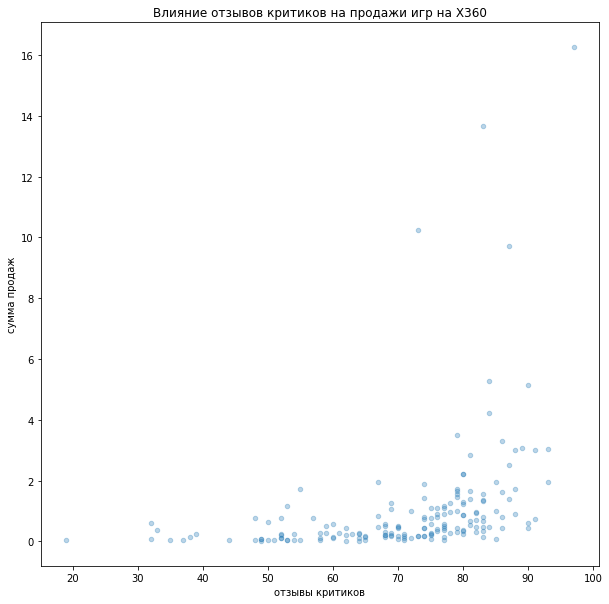

In [24]:
x360=actual_data.query('platform=="X360"')
x360.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,10), alpha=0.3, 
          ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('–æ—Ç–∑—ã–≤—ã –∫—Ä–∏—Ç–∏–∫–æ–≤'))\
.set_title('–í–ª–∏—è–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –∏–≥—Ä –Ω–∞ X360');
print('–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ ',x360['critic_score'].corr(x360['total_sales']));

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏  0.006163978646213326


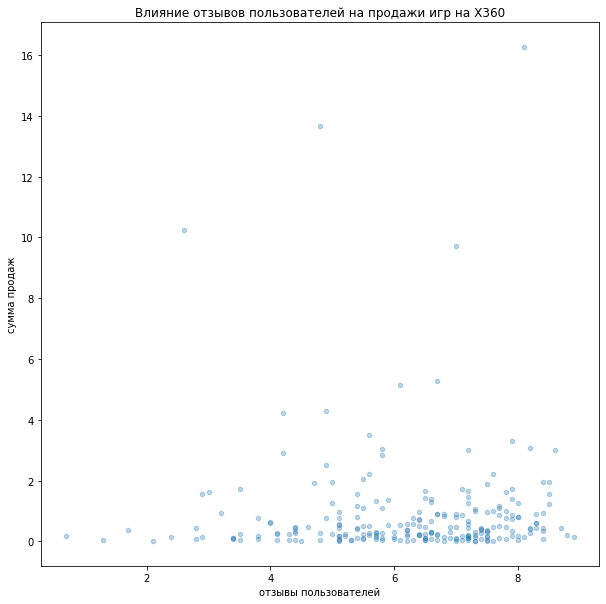

In [25]:
x360.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,10), alpha=0.3,
         ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('–æ—Ç–∑—ã–≤—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π')).set_title('–í–ª–∏—è–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –∏–≥—Ä –Ω–∞ X360');
print('–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ ',x360['user_score'].corr(x360['total_sales']));

In all cases, critic reviews correlate with sales, user reviews do not.

### The influence of genres on sales

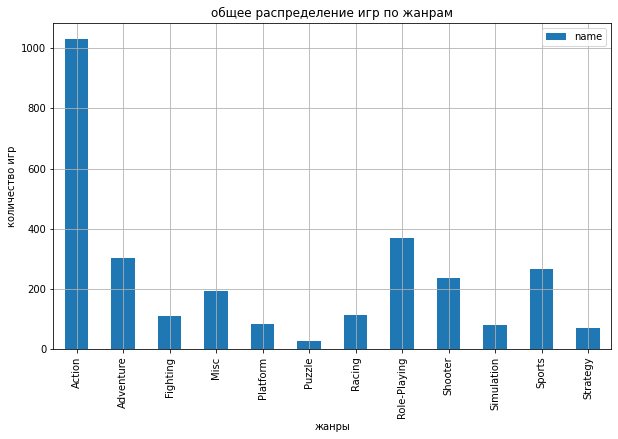

In [27]:
actual_data.pivot_table(index='genre', values='name', aggfunc='count')\
.plot(kind='bar', grid=True,figsize=(10,6), ylabel=('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä'), xlabel=('–∂–∞–Ω—Ä—ã')).set_title('–æ–±—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–≥—Ä –ø–æ –∂–∞–Ω—Ä–∞–º');


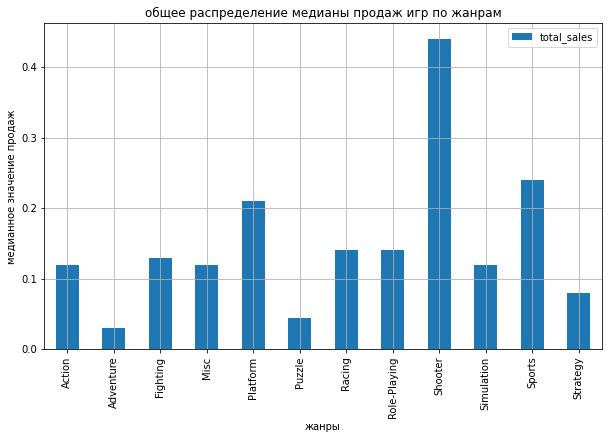

In [28]:
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.plot(kind='bar', grid=True, figsize=(10,6), ylabel=('–º–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–æ–¥–∞–∂'), xlabel=('–∂–∞–Ω—Ä—ã')).set_title('–æ–±—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ–¥–∏–∞–Ω—ã –ø—Ä–æ–¥–∞–∂ –∏–≥—Ä –ø–æ –∂–∞–Ω—Ä–∞–º');


–ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –∏–≥—Ä –≤—ã–ø—É—Å–∫–∞–µ—Ç—Å—è –≤ –∂–∞–Ω—Ä–∞—Ö Action –∏ Role-Playing. –ú–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≥–ª–æ–±–∞–ª—å–Ω—ã—Ö –ø—Ä–æ–¥–∞–∂ –±–ª–∏–∑–∫–∏ –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ –∂–∞–Ω—Ä–æ–≤. –ö –Ω–∞–∏–±–æ–ª–µ–µ –ø—Ä–∏–±—ã–ª—å–Ω—ã–º –º–æ–∂–Ω–æ –æ—Ç–Ω–µ—Å—Ç–∏ Platform, Shooter, Sports. –ù–∞–∏–º–µ–Ω–µ–µ –ø—Ä–∏–±—ã–ª—å–Ω—ã–π –∂–∞–Ω—Ä - Adventure.

## User portrait

### North America

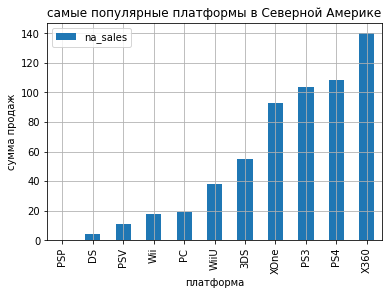

In [29]:
actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values('na_sales').plot(kind='bar', grid=True, ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('–ø–ª–∞—Ç—Ñ–æ—Ä–º–∞')).set_title('—Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –≤ –°–µ–≤–µ—Ä–Ω–æ–π –ê–º–µ—Ä–∏–∫–µ');


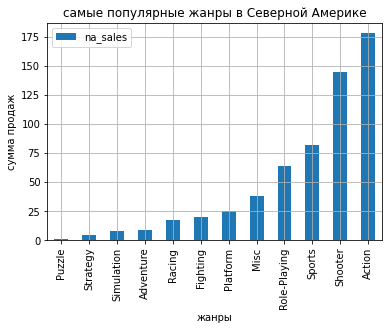

In [30]:
actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
.sort_values('na_sales').plot(kind='bar', grid=True, ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('–∂–∞–Ω—Ä—ã')).set_title('—Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã –≤ –°–µ–≤–µ—Ä–Ω–æ–π –ê–º–µ—Ä–∏–∫–µ');


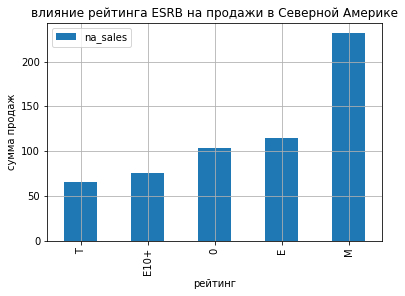

In [31]:
actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum')\
.sort_values('na_sales').plot(kind='bar', grid=True, ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('—Ä–µ–π—Ç–∏–Ω–≥'))\
.set_title('–≤–ª–∏—è–Ω–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∞ ESRB –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –≤ –°–µ–≤–µ—Ä–Ω–æ–π –ê–º–µ—Ä–∏–∫–µ');


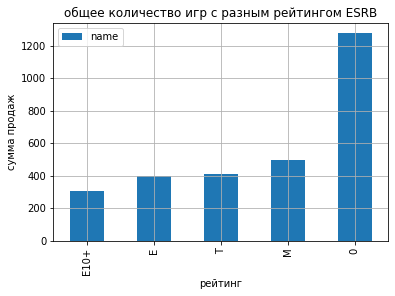

In [32]:
actual_data.pivot_table(index='rating', values='name', aggfunc='count')\
.sort_values('name').plot(kind='bar', grid=True, ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('—Ä–µ–π—Ç–∏–Ω–≥'))\
.set_title('–æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä —Å —Ä–∞–∑–Ω—ã–º —Ä–µ–π—Ç–∏–Ω–≥–æ–º ESRB');


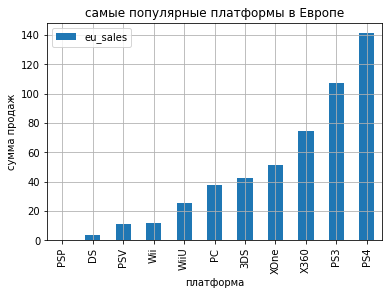

In [33]:
actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values('eu_sales').plot(kind='bar', grid=True, ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('–ø–ª–∞—Ç—Ñ–æ—Ä–º–∞'))\
.set_title('—Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –≤ –ï–≤—Ä–æ–ø–µ');


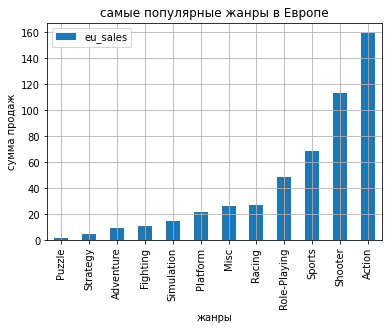

In [34]:
actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
.sort_values('eu_sales').plot(kind='bar', grid=True, ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('–∂–∞–Ω—Ä—ã'))\
.set_title('—Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã –≤ –ï–≤—Ä–æ–ø–µ');


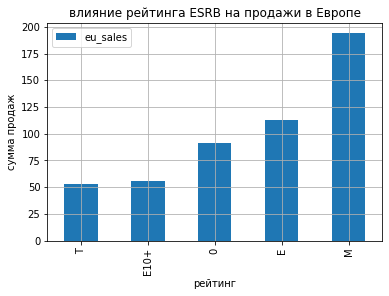

In [35]:
actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')\
.sort_values('eu_sales').plot(kind='bar', grid=True, ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('—Ä–µ–π—Ç–∏–Ω–≥'))\
.set_title('–≤–ª–∏—è–Ω–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∞ ESRB –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –≤ –ï–≤—Ä–æ–ø–µ');


### Japan (JP)

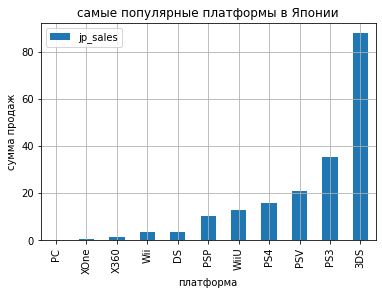

In [36]:
actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values('jp_sales').plot(kind='bar', grid=True, ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('–ø–ª–∞—Ç—Ñ–æ—Ä–º–∞'))\
.set_title('—Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –≤ –Ø–ø–æ–Ω–∏–∏');


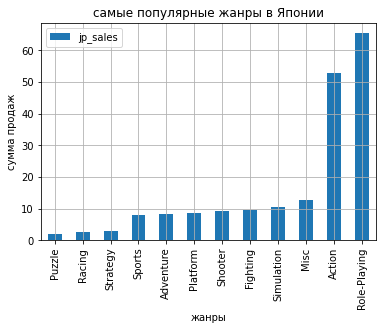

In [37]:
actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
.sort_values('jp_sales').plot(kind='bar', grid=True, ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('–∂–∞–Ω—Ä—ã'))\
.set_title('—Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã –≤ –Ø–ø–æ–Ω–∏–∏');


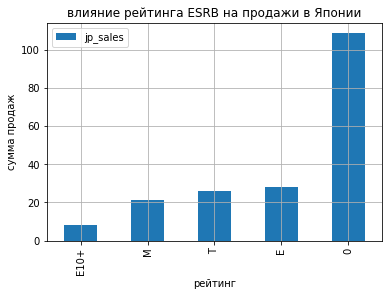

In [38]:
actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')\
.sort_values('jp_sales').plot(kind='bar', grid=True, ylabel=('—Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂'), xlabel=('—Ä–µ–π—Ç–∏–Ω–≥'))\
.set_title('–≤–ª–∏—è–Ω–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∞ ESRB –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –≤ –Ø–ø–æ–Ω–∏–∏');


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–≥—Ä –ø–æ –∂–∞–Ω—Ä–∞–º –ø–æ—Ö–æ–∂–µ –≤ –°–®–ê –∏ –ï–≤—Ä–æ–ø–µ, –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–º–∏ —è–≤–ª—è—é—Ç—Å—è Action, Shooter –∏ Sports, –≤ –Ø–ø–æ–Ω–∏–∏ –∂–µ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–º –∂–∞–Ω—Ä–æ–º —è–≤–ª—è—é—Ç—Å—è –†–æ–ª–µ–≤—ã–µ –∏–≥—Ä—ã, –∏ Action, –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –∏–º–µ—é—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –º–µ–Ω—å—à—É—é –¥–æ–ª—é  –ø—Ä–æ–¥–∞–∂. –í–µ—Ä–æ—è—Ç–Ω–æ —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å –∫—É–ª—å—Ç—É—Ä–Ω—ã–º–∏ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—è–º–∏. –ù–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–º–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º–∏ –≤ –°–®–ê –∏ –ï–≤—Ä–æ–ø–µ —è–≤–ª—è—é—Ç—Å—è  X360, PS4, PS3. –í –Ø–ø–æ–Ω–∏–∏ –∂–µ –±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã 3DS,PS3 –∏ PSV —á—Ç–æ –æ—á–µ–≤–∏–¥–Ω–æ, —Å–≤—è–∑–∞–Ω–æ —Å –≤—ã–ø—É—Å–∫–æ–º –±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –≤ –Ø–ø–æ–Ω–∏–∏ —Ä–æ–ª–µ–≤—ã—Ö –∏–≥—Ä –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞—Ö PSV –∏ 3DS. –ü—Ä–∏—Å–≤–æ–µ–Ω–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∞ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –∏–≥—Ä –≤ –°–®–ê –∏ –ï–≤—Ä–æ–ø–µ, –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–∫—É–ø–∞–µ–º—ã–º–∏ —è–≤–ª—è—é—Ç—Å—è –∏–≥—Ä—ã —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º –ú, –≤ –Ø–ø–æ–Ω–∏–∏ –∂–µ, –Ω–∞–æ–±–æ—Ä–æ—Ç, –ª–∏–¥–∏—Ä—É—é—Ç –∏–≥—Ä—ã –±–µ–∑ —Ä–µ–π—Ç–∏–Ω–≥–∞, —á—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∑–¥–µ—Å—å —Ä–æ–ª–µ–≤—ã–µ –∏–≥—Ä—ã –Ω–µ –∏–º–µ—é—Ç —Ä–µ–π—Ç–∏–Ω–≥–∞.

##  –ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑
 

### üìä –°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º Xbox One –∏ PC –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ;

–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º Xbox One –∏ PC –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ

In [39]:
Xone_score = actual_data.query('platform=="XOne"')['user_score'].dropna() 
PC_score = actual_data.query('platform=="PC"')['user_score'].dropna()

alpha = 0.05 # —É—Ä–æ–≤–µ–Ω—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏
# –µ—Å–ª–∏ p-value –æ–∫–∞–∂–µ—Ç—Å—è –º–µ–Ω—å—à–µ –Ω–µ–≥–æ, –æ—Ç–≤–µ—Ä–≥–Ω–µ–º –≥–∏–ø–æ—Ç–µ–∑—É

results = st.ttest_ind(Xone_score, PC_score)

print('p-–∑–Ω–∞—á–µ–Ω–∏–µ:', results.pvalue)

if results.pvalue < alpha:
    print('–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')
else:
    print('–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')

p-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.5535080500643661
–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


–í—ã–≤–æ–¥: –ø—Ä–∏ —É—Ä–æ–≤–Ω–µ —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 0.05 –°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º Xbox One –∏ PC –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ

### üìä –°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action (–∞–Ω–≥–ª. ¬´–¥–µ–π—Å—Ç–≤–∏–µ¬ª, —ç–∫—à–µ–Ω-–∏–≥—Ä—ã) –∏ Sports (–∞–Ω–≥–ª. ¬´—Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–µ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è¬ª) —Ä–∞–∑–Ω—ã–µ.

–ü—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action (–∞–Ω–≥–ª. ¬´–¥–µ–π—Å—Ç–≤–∏–µ¬ª, —ç–∫—à–µ–Ω-–∏–≥—Ä—ã) –∏ Sports (–∞–Ω–≥–ª. ¬´—Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–µ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è¬ª) —Ä–∞–∑–Ω—ã–µ
–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action (–∞–Ω–≥–ª. ¬´–¥–µ–π—Å—Ç–≤–∏–µ¬ª, —ç–∫—à–µ–Ω-–∏–≥—Ä—ã) –∏ Sports (–∞–Ω–≥–ª. ¬´—Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–µ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è¬ª) —Ä–∞–≤–Ω—ã

In [40]:
action_score = actual_data.query('genre=="Action"')['user_score'].dropna() 
sports_score = actual_data.query('genre=="Sports"')['user_score'].dropna()

alpha = 0.05 

results = st.ttest_ind(action_score, sports_score)

print('p-–∑–Ω–∞—á–µ–Ω–∏–µ:', results.pvalue)

if results.pvalue < alpha:
    print('–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')
else:
    print('–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')

p-–∑–Ω–∞—á–µ–Ω–∏–µ: 3.7163089460934874e-26
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


–í—ã–≤–æ–¥: –ø—Ä–∏ —É—Ä–æ–≤–Ω–µ —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 0.05 —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action (–∞–Ω–≥–ª. ¬´–¥–µ–π—Å—Ç–≤–∏–µ¬ª, —ç–∫—à–µ–Ω-–∏–≥—Ä—ã) –∏ Sports (–∞–Ω–≥–ª. ¬´—Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–µ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è¬ª) —Ä–∞–∑–Ω—ã–µ

–û–±—â–∏–π –≤—ã–≤–æ–¥ –ø–æ —Ä–∞–∑–¥–µ–ª—É

    –ì–∏–ø–æ—Ç–µ–∑–∞ –æ —Ç–æ–º, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ Xbox One –∏ PC –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –Ω–µ –±—ã–ª–∞ –æ–ø—Ä–æ–≤–µ—Ä–≥–Ω—É—Ç–∞.
    –ì–∏–ø–æ—Ç–µ–∑–∞ –æ —Ç–æ–º, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action –∏ Sports –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –±—ã–ª–∞ –æ—Ç–≤–µ—Ä–Ω—É—Ç–∞.

## –û–±—â–∏–π –≤—ã–≤–æ–¥

**–†—ã–Ω–æ–∫ –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω—ã—Ö –∏–≥—Ä –∑–∞ –≤–µ—Å—å –ø–µ—Ä–∏–æ–¥**

–ê–∫—Ç–∏–≤–Ω–æ–µ —Ä–∞–∑–≤–∏—Ç–∏–µ —Ä—ã–Ω–∫–∞ –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω—ã—Ö –∏–≥—Ä –Ω–∞—á–∞–ª–æ—Å—å —Å 1992 –≥–æ–¥–∞ –∏ —Ä—ã–Ω–æ–∫ —Å—Ç–∞–±–∏–ª—å–Ω–æ —Ä–æ—Å –¥–æ 2009. –í 2011 –≥–æ–¥—É –≤–∏–¥–Ω–æ —Ä–µ–∑–∫–æ–µ –ø–∞–¥–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≤—ã–ø—É—Å–∫–∞–µ–º—ã—Ö –∏–≥—Ä, —á—Ç–æ –≤–µ—Ä–æ—è—Ç–Ω–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ä–µ–∑–∫–∏–º –≤–∑–ª–µ—Ç–æ–º —Ä—ã–Ω–∫–∞ –º–æ–±–∏–ª—å–Ω—ã—Ö —É—Å—Ç—Ä–æ–π—Å—Ç–≤.

"–°—Ä–æ–∫ –∂–∏–∑–Ω–∏" –∏–≥—Ä–æ–≤–æ–π –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–∫–æ–ª–æ 10 –ª–µ—Ç. –î–ª—è –ø–ª–∞—Ç—Ñ–æ—Ä–º —Ö–∞—Ä–∞–∫—Ç–µ—Ä–µ–Ω  –±—ã—Å—Ç—Ä—ã–π —Ä–æ—Å—Ç –ø—Ä–æ–¥–∞–∂ –∏ —Å—Ç—Ä–µ–º–∏—Ç–µ–ª—å–Ω–æ–µ –ø–∞–¥–µ–Ω–∏–µ. –ü–∏–∫ –ø—Ä–æ–¥–∞–∂ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –≤ —Å—Ä–µ–¥–Ω–µ–º –Ω–∞ 5 –≥–æ–¥ –∂–∏–∑–Ω–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã. 

–î–ª—è –≤—ã—è–≤–ª–µ–Ω–∏—è –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–µ–π –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∑–≤–æ–ª—è—Ç –¥–µ–ª–∞—Ç—å –ø—Ä–æ–≥–Ω–æ–∑—ã –æ —Ä–∞–∑–≤–∏—Ç–∏–∏ —Ä—ã–Ω–∫–∞ –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω—ã—Ö –∏–≥—Ä –≤ –±—É–¥—É—â–∏—Ö –ø–µ—Ä–∏–æ–¥–∞—Ö –±—ã–ª —Å—É–∂–µ–Ω –ø–µ—Ä–∏–æ–¥ –¥–∞–Ω–Ω—ã—Ö - 2012 - 2016 –≥–æ–¥–∞.

**–†—ã–Ω–æ–∫ –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω—ã—Ö –∏–≥—Ä —Å 2012 –≥–æ–¥–∞**

–°—É–º–º–∞—Ä–Ω–æ —Å 2012 –ø–æ 2016 –≥–æ–¥ —Ç—Ä–æ–π–∫–∞ –ª–∏–¥–µ—Ä–æ–≤ —Å—Ä–µ–¥–∏ –∏–≥—Ä–æ–≤—ã—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º: PS4, PS3 –∏ X360. –û–∂–∏–¥–∞–µ—Ç—Å—è –≤ –±–ª–∏–∂–∞–π—à–∏—Ö –ø–µ—Ä–∏–æ–¥–∞—Ö —Ä–æ—Å—Ç –ø–ª–∞—Ç—Ñ–æ—Ä–º XOne –∏ PS4. –û–±–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –ø–æ—è–≤–∏–ª–∏—Å—å –≤ 2013 –≥–æ–¥—É. –ï—Å–ª–∏ –∏—Å—Ö–æ–¥–∏—Ç—å –∏–∑ 10-–ª–µ—Ç–Ω–µ–≥–æ –∂–∏–∑–Ω–µ–Ω–Ω–æ–≥–æ —Ü–∏–∫–ª–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã, —Ç–æ –≤ —Å–ª–µ–¥—É—é—â–∏–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ª–µ—Ç –æ–±–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –ø—Ä–æ–¥–æ–ª–∂–∞—Ç —Ä–æ—Å—Ç.

–ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –∏–≥—Ä –≤—ã–ø—É—Å–∫–∞–µ—Ç—Å—è –≤ –∂–∞–Ω—Ä–∞—Ö Action –∏ Role-Playing. –ú–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≥–ª–æ–±–∞–ª—å–Ω—ã—Ö –ø—Ä–æ–¥–∞–∂ –±–ª–∏–∑–∫–∏ –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ –∂–∞–Ω—Ä–æ–≤. –ö –Ω–∞–∏–±–æ–ª–µ–µ –ø—Ä–∏–±—ã–ª—å–Ω—ã–º –º–æ–∂–Ω–æ –æ—Ç–Ω–µ—Å—Ç–∏ Platform, Shooter, Sports. –ù–∞–∏–º–µ–Ω–µ–µ –ø—Ä–∏–±—ã–ª—å–Ω—ã–π –∂–∞–Ω—Ä - Adventure.

–û—Ç–ª–∏—á–∏—è –≤ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ä–µ–≥–∏–æ–Ω–∞:

    –ú–µ–∂–¥—É —Ä—ã–Ω–∫–∞–º–∏ –°–µ–≤–µ—Ä–Ω–æ–π –ê–º–µ—Ä–∏–∫–∏ –∏ –ï–≤—Ä–æ–ø—ã –ø—Ä–∞–≤–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Ç –æ—Ç–ª–∏—á–∏–π –≤ –ø–æ—Ä—Ç—Ä–µ—Ç–∞—Ö –ø–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.
    –°—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è —Ä—ã–Ω–æ–∫ –Ø–ø–æ–Ω–∏–∏. –ó–¥–µ—Å—å –ø–æ–ø—É–ª—è—Ä–Ω—ã —Å–æ–≤—Å–µ–º –¥—Ä—É–≥–∏–µ –∂–∞–Ω—Ä—ã, —á–µ–º –≤ –ê–º–µ—Ä–∏–∫–µ –∏ –ï–≤—Ä–æ–ø–µ. –ù–∞ –ø–µ—Ä–≤–æ–º –º–µ—Å—Ç–µ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –∂–∞–Ω—Ä Role_playing. –¢–∞–∫–∂–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –Ω–∞–±–æ—Ä –∏–≥—Ä–æ–≤—ã—Ö –ø–ª–∞—Ç—Ñ–æ–º.


–í –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö –≤—ã—è–≤–ª–µ–Ω–∞ —Å–≤—è–∑—å –º–µ–∂–¥—É –æ—Ü–µ–Ω–∫–æ–π –∫—Ä–∏—Ç–∏–∫–æ–≤ –∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏, –Ω–æ –Ω–µ—Ç —Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø—Ä–æ–¥–∞–∂–∞–º–∏ –∏ –æ—Ü–µ–Ω–∫–æ–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

–¢–∞–∫–∂–µ –≤ —Ö–æ–¥–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –±—ã–ª–∏ –ø—Ä–æ–≤–µ—Ä–µ–Ω—ã 2 –≥–∏–ø–æ—Ç–µ–∑—ã:

    –ì–∏–ø–æ—Ç–µ–∑–∞ –æ —Ç–æ–º, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ Xbox One –∏ PC –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –Ω–µ –±—ã–ª–∞ –æ–ø—Ä–æ–≤–µ—Ä–≥–Ω—É—Ç–∞.
    –ì–∏–ø–æ—Ç–µ–∑–∞ –æ —Ç–æ–º, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action –∏ Sports –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –±—ã–ª–∞ –æ—Ç–≤–µ—Ä–Ω—É—Ç–∞.

